In [21]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Load the crystal structure and the AlphaFold predictions
crystal_structure = md.load('../Input/6d1r.pdb')

In [23]:
# Here we are selecting alpha carbons for one and all atoms for the other RMSD calculation
alpha_carbon_indices = crystal_structure.topology.select('name CA')
all_atom_indices=crystal_structure.topology.select('backbone or sidechain')
# all_atom_indices = np.arange(crystal_structure.n_atoms)
rmsd_alpha_carbons = []
rmsd_full_backbone = []

for i in range(1,6):
    predicted_structure =md.load(f'../Input/6D1R_AlphaFold/relaxed_model_{i}_pred_0.pdb') 
    # Align and calculate RMSD for alpha carbons
    predicted_structure_aligned = predicted_structure.superpose(crystal_structure, atom_indices=alpha_carbon_indices)
    rmsd_alpha = md.rmsd(predicted_structure_aligned, crystal_structure, atom_indices=alpha_carbon_indices)
    rmsd_alpha_carbons.append(rmsd_alpha[0])  # md.rmsd returns a numpy array, get the first element

    # Align and calculate RMSD for full structure
    predicted_structure_aligned = predicted_structure.superpose(crystal_structure,atom_indices=all_atom_indices)
    rmsd_full = md.rmsd(predicted_structure_aligned, crystal_structure,atom_indices=all_atom_indices)
    rmsd_full_backbone.append(rmsd_full[0])  # Again, get the first element


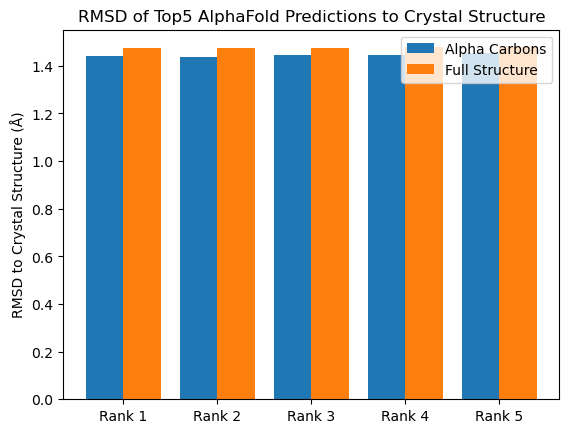

In [24]:
# Now we can plot the RMSD values
fig, ax = plt.subplots()
bar1=ax.bar(np.arange(len(rmsd_alpha_carbons))-0.2, rmsd_alpha_carbons, width=0.4,label='Alpha Carbons')
bar2=ax.bar(np.arange(len(rmsd_full_backbone))+0.2, rmsd_full_backbone, width=0.4,label='Full Structure')
ax.set_ylabel('RMSD to Crystal Structure (Å)')

ax.set_title('RMSD of Top5 AlphaFold Predictions to Crystal Structure')
ax.set_xticks(np.arange(len(rmsd_alpha_carbons)))
ax.set_xticklabels([f'Rank {i}' for i in range(1,6)])
ax.legend()

In [2]:
import py3Dmol
# Load the PDB file as a string
pdb_string = open('../Input/6D1R_AlphaFold/relaxed_model_1_pred_0.pdb', 'r').read()

# Initialize the viewer
view = py3Dmol.view()

# Add the PDB to the viewer
view.addModel(pdb_string, 'pdb')

# Style the protein based on B-factor
view.setStyle({'cartoon': {'colorscheme': {'prop': 'b', 'gradient': 'roygb', 'min': 0, 'max': 100}}})

# Zoom to the protein
view.zoomTo()

# Show the viewer
view.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

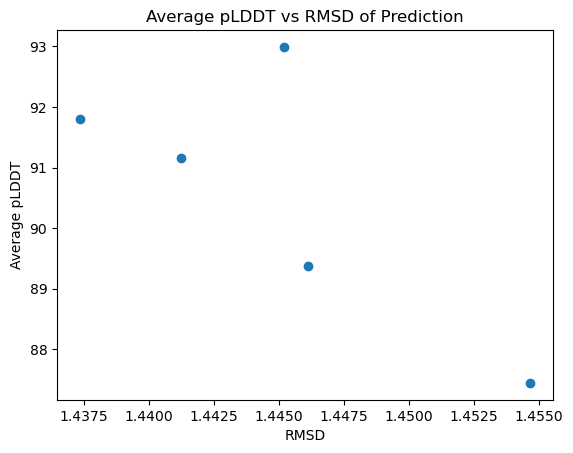

In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
# Function to calculate RMSD (needs to be defined based on how you calculate RMSD)
def calculate_rmsd(prediction_structure, reference_structure):
    # RMSD calculation logic goes here
    pass

# Assuming we have a list of pkl files and a reference structure
pkl_files = ['../Input/6D1R_AlphaFold/result_model_1_pred_0.pkl',
'../Input/6D1R_AlphaFold/result_model_2_pred_0.pkl',
'../Input/6D1R_AlphaFold/result_model_3_pred_0.pkl',
'../Input/6D1R_AlphaFold/result_model_4_pred_0.pkl',
'../Input/6D1R_AlphaFold/result_model_5_pred_0.pkl',]

# Lists to hold pLDDT scores and RMSDs
plddt_scores = []

# Load each pkl file and calculate pLDDT and RMSD
for pkl_file in pkl_files:
    with open(pkl_file, 'rb') as f:
        prediction_data = pickle.load(f)
        plddt = prediction_data['plddt']
        average_plddt = np.mean(plddt)
        plddt_scores.append(average_plddt)

# Now we can plot the results
plt.scatter(rmsd_alpha_carbons, plddt_scores)
plt.xlabel('RMSD')
plt.ylabel('Average pLDDT')
plt.title('Average pLDDT vs RMSD of Prediction')
plt.show()
